In [1]:
import requests
import pandas as pd
from zipfile import ZipFile
from io import BytesIO
from tqdm import tqdm, trange

In [2]:
data_url = 'https://s3.amazonaws.com/tripdata/202401-citibike-tripdata.csv.zip'

In [ ]:
data_list = []

for month in range(1,13):
    month_str = str(month).zfill(2)

    print(f'___{month}___')

    try:
        data_url = f'https://s3.amazonaws.com/tripdata/2024{month_str}-citibike-tripdata.zip'

        r = requests.get(data_url)

        r.raise_for_status()

    except requests.HTTPError:
        data_url = f'https://s3.amazonaws.com/tripdata/2024{month_str}-citibike-tripdata.csv.zip'

        r = requests.get(data_url)

        r.raise_for_status()

    except requests.HTTPError:
        print(f'error on {month}')
        continue

    print('✓ data downloaded')

    with ZipFile(BytesIO(r.content)) as zip_folder:
        
        zip_data_files = zip_folder.namelist()

        files_to_open = [file for file in zip_data_files if 'MACOSX' not in file and '.csv' in file]
        
        for file in tqdm(files_to_open, desc='subset: '):
            if 'MACOSX' not in file and '.csv' in file:
                data_subset = pd.read_csv(
                    zip_folder.open(file),
                    dtype={
                        'start_station_id':str,
                        'end_station_id':str
                    }
                )

                data_list.append(data_subset)

    print('✓ data read')

    

In [ ]:
data = pd.concat(data_list, ignore_index=True)

data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Unnamed: 0,rideable_type_duplicate_column_name_1
0,5078F3D302000BD2,electric_bike,2024-01-22 18:43:19.012,2024-01-22 18:48:10.708,Frederick Douglass Blvd & W 145 St,7954.12,St Nicholas Ave & W 126 St,7756.10,40.823072,-73.941738,40.811432,-73.951878,member,NaN,NaN
1,814337105D37302A,electric_bike,2024-01-11 19:19:18.721,2024-01-11 19:47:36.007,W 54 St & 6 Ave,6771.13,E 74 St & 1 Ave,6953.08,40.761822,-73.977036,40.768974,-73.954823,member,NaN,NaN
2,A33A920E2B10710C,electric_bike,2024-01-30 19:17:41.693,2024-01-30 19:32:49.857,E 11 St & Ave B,5659.11,W 10 St & Washington St,5847.06,40.727592,-73.979751,40.733424,-74.008515,casual,NaN,NaN
3,A3A5FC0DD7D34D74,electric_bike,2024-01-27 11:27:01.759,2024-01-27 11:38:01.213,W 54 St & 6 Ave,6771.13,E 74 St & 1 Ave,6953.08,40.761779,-73.977144,40.768974,-73.954823,member,NaN,NaN
4,6F96728ECEFBDAA4,electric_bike,2024-01-16 15:15:41.000,2024-01-16 15:29:26.156,Madison Ave & E 99 St,7443.01,E 74 St & 1 Ave,6953.08,40.789808,-73.952214,40.768974,-73.954823,member,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44399603,13EB30D7397BBCDE,electric_bike,2024-12-21 19:08:07.762,2024-12-21 19:11:49.783,Carlton Ave & Greene Ave,4386.07,Lexington Ave & Classon Ave,4452.03,40.685957,-73.971468,40.686768,-73.959282,member,NaN,NaN
44399604,7D6E70ABBAA11BC2,classic_bike,2024-12-17 18:59:56.045,2024-12-17 19:05:22.117,2 Ave & E 72 St,6925.09,E 81 St & York Ave,7084.12,40.768762,-73.958408,40.772838,-73.949892,member,NaN,NaN
44399605,4FA84B4FF01FAA71,electric_bike,2024-12-18 06:44:59.074,2024-12-18 06:53:17.838,9 Ave & W 45 St,6717.06,E 56 St & Madison Ave,6732.01,40.760193,-73.991255,40.761573,-73.972628,member,NaN,NaN
44399606,5348AC0F55585FD8,electric_bike,2024-12-20 20:53:58.339,2024-12-20 21:02:04.731,Carroll St & 6 Ave,4019.06,Bond St & Bergen St,4404.10,40.674089,-73.978728,40.684967,-73.986208,member,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44399608 entries, 0 to 44399607
Data columns (total 15 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   ride_id                                object 
 1   rideable_type                          object 
 2   started_at                             object 
 3   ended_at                               object 
 4   start_station_name                     object 
 5   start_station_id                       object 
 6   end_station_name                       object 
 7   end_station_id                         object 
 8   start_lat                              float64
 9   start_lng                              float64
 10  end_lat                                float64
 11  end_lng                                float64
 12  member_casual                          object 
 13  Unnamed: 0                             float64
 14  rideable_type_duplicate_column_name_1  object 
d

In [ ]:
data['started_at'] = pd.to_datetime(data['started_at'], format='%Y-%m-%d %H:%M:%S', cache=True)

In [ ]:
data['ended_at'] = data['ended_at'].str.split('.',expand=True)[0]

In [ ]:
data['ended_at'] = pd.to_datetime(data['ended_at'], format='%Y-%m-%d %H:%M:%S', cache=True)

In [ ]:
total_rides_by_month_by_type=(
    data
    .groupby([
        pd.Grouper(key='started_at', freq='ME'),
        'rideable_type'
    ])
    .size()
    .rename('count_rides')
)

<Axes: xlabel='started_at'>

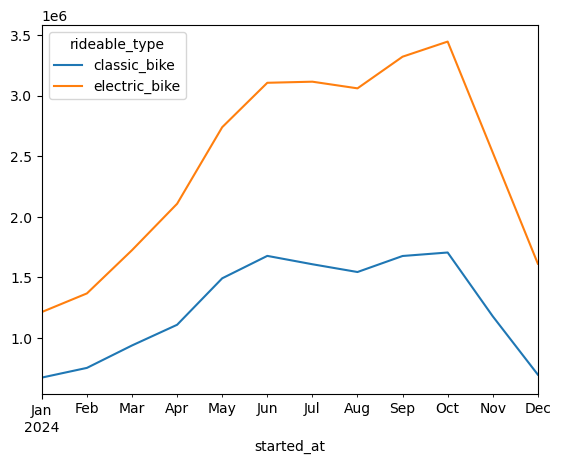

In [ ]:
(
    total_rides_by_month_by_type
    .unstack('rideable_type')
    .loc['2024']
    .plot.line()
)